# Model Inspector

> Inspect machine learning models

`model_inspector` aims to help you train better `scikit-learn` models by providing insights into their behavior.

## Use

To use `model_inspector`, you create an `Inspector` object from a `scikit-learn` model, a feature DataFrame `X`, and a target Series `y`. Typically you will want to create it on held-out data, as shown below.

In [ ]:
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from model_inspector import get_inspector

In [ ]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
rfr = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
rfr.score(X_test, y_test)

0.49419363561131635

In [ ]:
inspector = get_inspector(rfr, X_test, y_test)

You can then use various methods of `inspector` to learn about how your model behaves on that data.

The methods that are available for a given inspector depends on the types of its estimator and its target `y`. An attribute called `methods` tells you what they are:

In [ ]:
inspector.methods

['permutation_importance',
 'plot_feature_clusters',
 'plot_partial_dependence',
 'plot_permutation_importance',
 'plot_pred_vs_act',
 'plot_residuals',
 'show_correlation']

In [ ]:
inspector.permutation_importance()

bmi    0.253263
s5     0.216381
bp     0.041223
s6     0.038466
s4     0.011436
s3     0.009732
sex    0.008383
s1    -0.004575
s2    -0.012520
age   -0.014762
dtype: float64

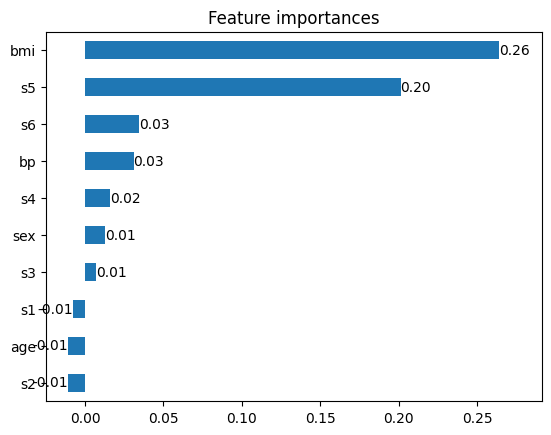

In [ ]:
ax = inspector.plot_permutation_importance()

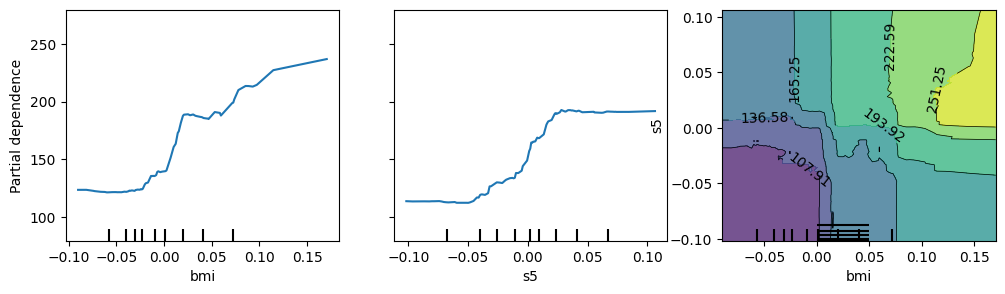

In [ ]:
most_important_features = inspector.permutation_importance().index[:2]
axes = inspector.plot_partial_dependence(
    features=[*most_important_features, most_important_features]
)
axes[0, 0].get_figure().set_size_inches(12, 3)

In [ ]:
inspector.show_correlation()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.27,0.21,0.33,0.23,0.28,-0.12,0.22,0.13,0.25,0.19
sex,0.27,1.00,0.21,0.46,0.07,0.20,-0.41,0.36,0.24,0.16,0.18
bmi,0.21,0.21,1.00,0.41,0.30,0.35,-0.40,0.46,0.52,0.40,0.64
bp,0.33,0.46,0.41,1.00,0.25,0.26,-0.22,0.28,0.38,0.34,0.44
s1,0.23,0.07,0.30,0.25,1.00,0.90,0.08,0.50,0.51,0.27,0.29
s2,0.28,0.20,0.35,0.26,0.90,1.00,-0.25,0.70,0.43,0.28,0.31
s3,-0.12,-0.41,-0.40,-0.22,0.08,-0.25,1.00,-0.75,-0.47,-0.21,-0.49
s4,0.22,0.36,0.46,0.28,0.50,0.70,-0.75,1.00,0.65,0.33,0.54
s5,0.13,0.24,0.52,0.38,0.51,0.43,-0.47,0.65,1.00,0.36,0.69
s6,0.25,0.16,0.40,0.34,0.27,0.28,-0.21,0.33,0.36,1.00,0.39


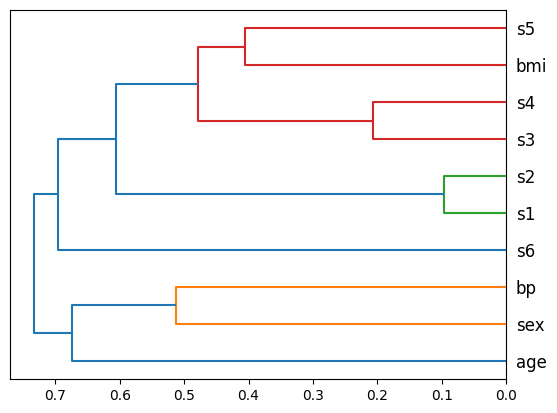

In [ ]:
ax = inspector.plot_feature_clusters()

## Install

`pip install model_inspector`

## Alternatives

The most similar library to model_inspector that I am aware of is [Yellowbrick](https://www.scikit-yb.org/en/latest/). Both are machine learning visualization libraries designed to extend `scikit-learn`.

Yellowbrick is designed around `Visualizer` objects. Each `Visualizer` corresponds to a single type of visualization. The `Visualizer` interface is similar to the `scikit-learn` transformer and estimator interfaces.

`model_inspector` takes a different approach. It is designed around `Inspector` objects that bundle together a `scikit-learn` model, an `X` feature DataFrame, and a `y` target Series. The `Inspector` object does the work of identifying appropriate visualization types for the specific model and dataset in question and exposing corresponding methods, making it easy to visualize a given model for a given dataset in a variety of ways.

## Acknowledgments

Many aspects of this library were inspired by [FastAI courses](https://course.fast.ai/), including bundling together a model with data in a class and providing certain specific visualization methods such as feature importance bar plots, feature clusters dendrograms, tree diagrams, waterfall plots, and partial dependence plots. Its primary contribution is to make all of these methods available in a single convenient interface.